In [1]:
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install imblearn
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import random
import sys
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as po
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score, confusion_matrix,classification_report

from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer   # median  #most_frequent

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# from LoanFunctions import dtype_comparison,Distribution_Numerical
# from LoanFunctions import Distribution_Numerical,Missing_Value_Comparison,Box_Plot
import missingno as msno
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings("ignore")
from sklearn import set_config
set_config(display='diagram')
figsize=(20,9)

c:\Users\axt230046\AppData\Local\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



## Import Data

In [3]:
data = pd.read_csv(r'./AsModelInput.csv')
data.drop(['bas1', 'bas5', 'bas10', 'spl1', 'spl10', 'spl3cat', 'spl5'], axis=1, inplace=True)
data.head()

,As3Cat,BFI,DMppt8110,PRMS8110Re,LP2,LP4,LP6,Percent_Ti,as_c,be_c,bi_c,inorgc_c,mo_c,ni_c,orgc_c,p_c,sb_c,se_c,uc_12,uc_221,uc_312,uc_321,uc_322,uc_331,uc_421,uc_422,uc_431,uc_451,uc_620,uc_811,uc_812,uc_821,uc_822,uc_910,uc_920,uc_940,uc_960,uc_970,uc_999,rt_carb,rt_clast_c,rt_clast_f,rt_clast_u,rt_meta,rt_plut_qtz,D3,De,DSe,Kg,O2,Oe,PP4,Pzg1,Pzg2,Q,Qv,S2,Se,Te2,Tm,Toc,Tmc,Tp,Tpc,Tpv,Tr,Txc,uK2,uK3,uK3b,uK4,uPz,Wgn,na_10.1,na_11.1,na_12.1,na_13.1,na_6.2,na_7.1,na_8.1,na_8.2,na_9.2,na_9.3,na_9.4,na_9.5,na_9.6
0,C1,56,839.200,247.441884,9461,9082,5922,0.000000,3.17733,0.869639,0.080221,0.015112,0.325486,14.890099,0.143343,272.677001,0.308952,0.200479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,C1,55,893.233,195.643090,8643,2398,8320,0.000000,3.60064,1.010139,0.087147,0.016818,0.363400,16.245599,0.144275,297.666992,0.337125,0.200251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,C1,58,679.367,130.819832,8316,5797,5696,0.000000,3.78692,0.842530,0.101319,1.763579,0.631829,22.192300,0.375681,412.441986,0.412636,0.208570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,C1,57,840.633,247.441884,5557,7186,4927,0.953611,3.17733,0.869639,0.080221,0.015112,0.325486,14.890099,0.143343,272.677001,0.308952,0.200479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,C2,45,756.400,151.432342,9623,7179,6061,22.005550,8.16806,1.161360,0.163910,1.213449,1.437340,26.270799,0.397736,515.302001,0.886938,0.239735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Analyse Data

### Check Missing Values

<Axes: >

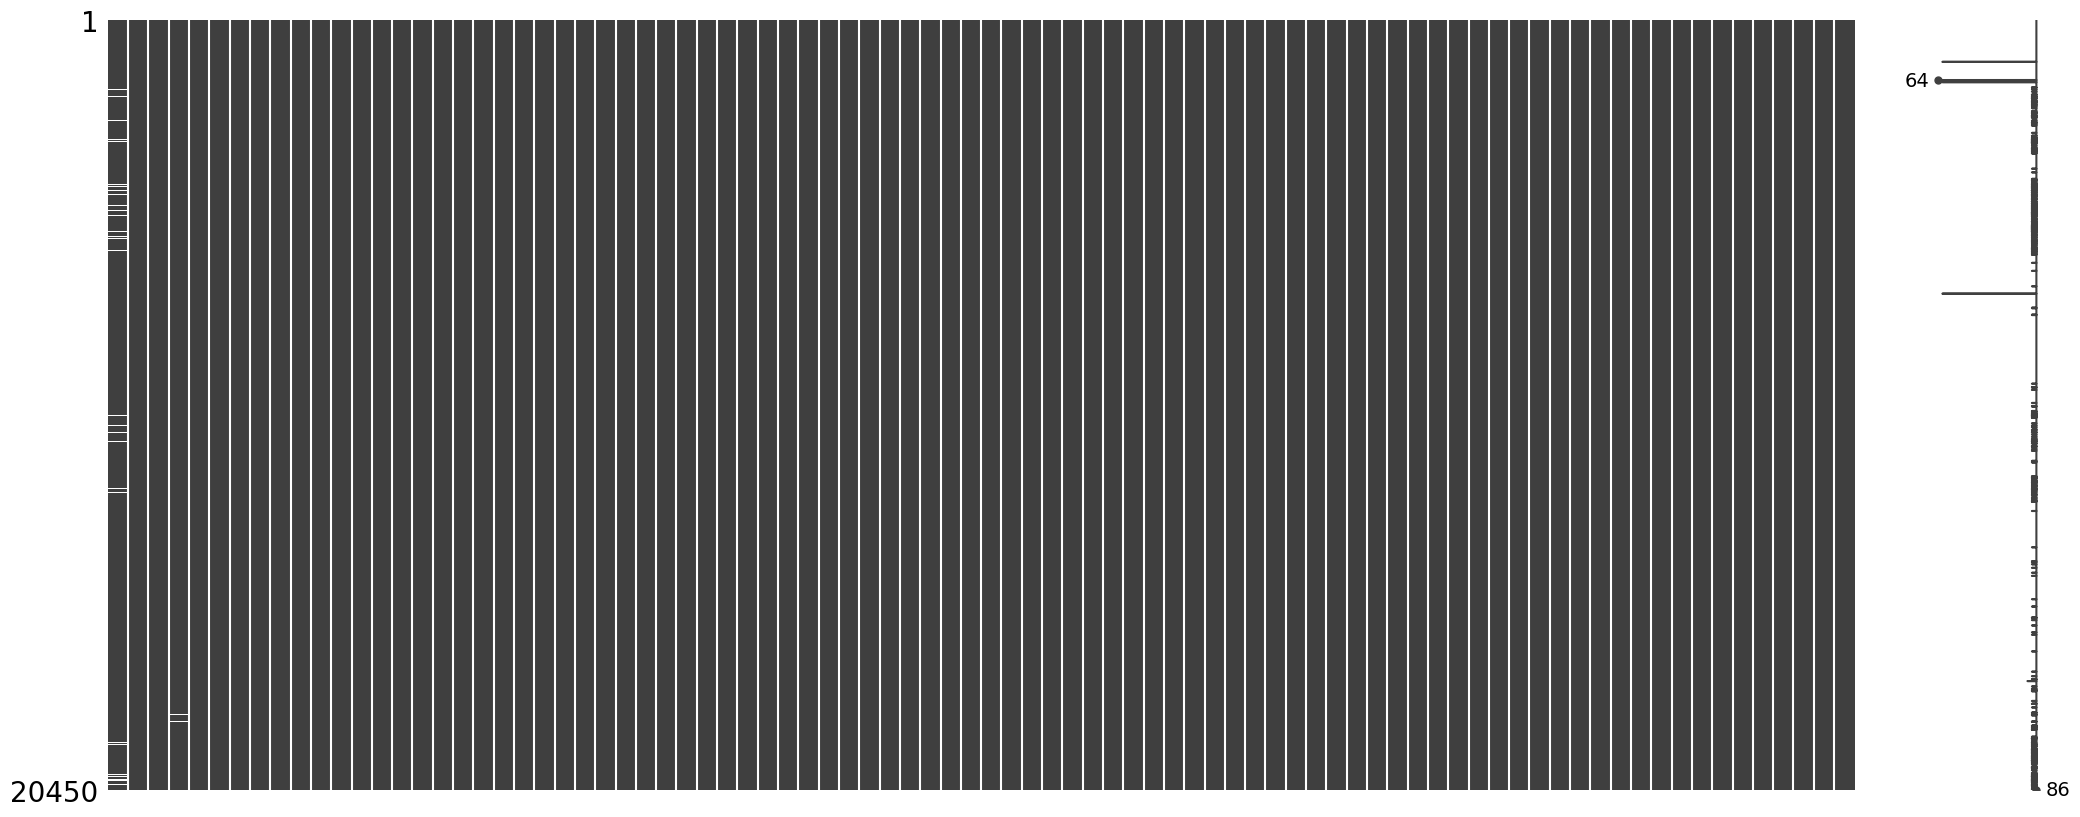

In [4]:
msno.matrix(data)

<Axes: >

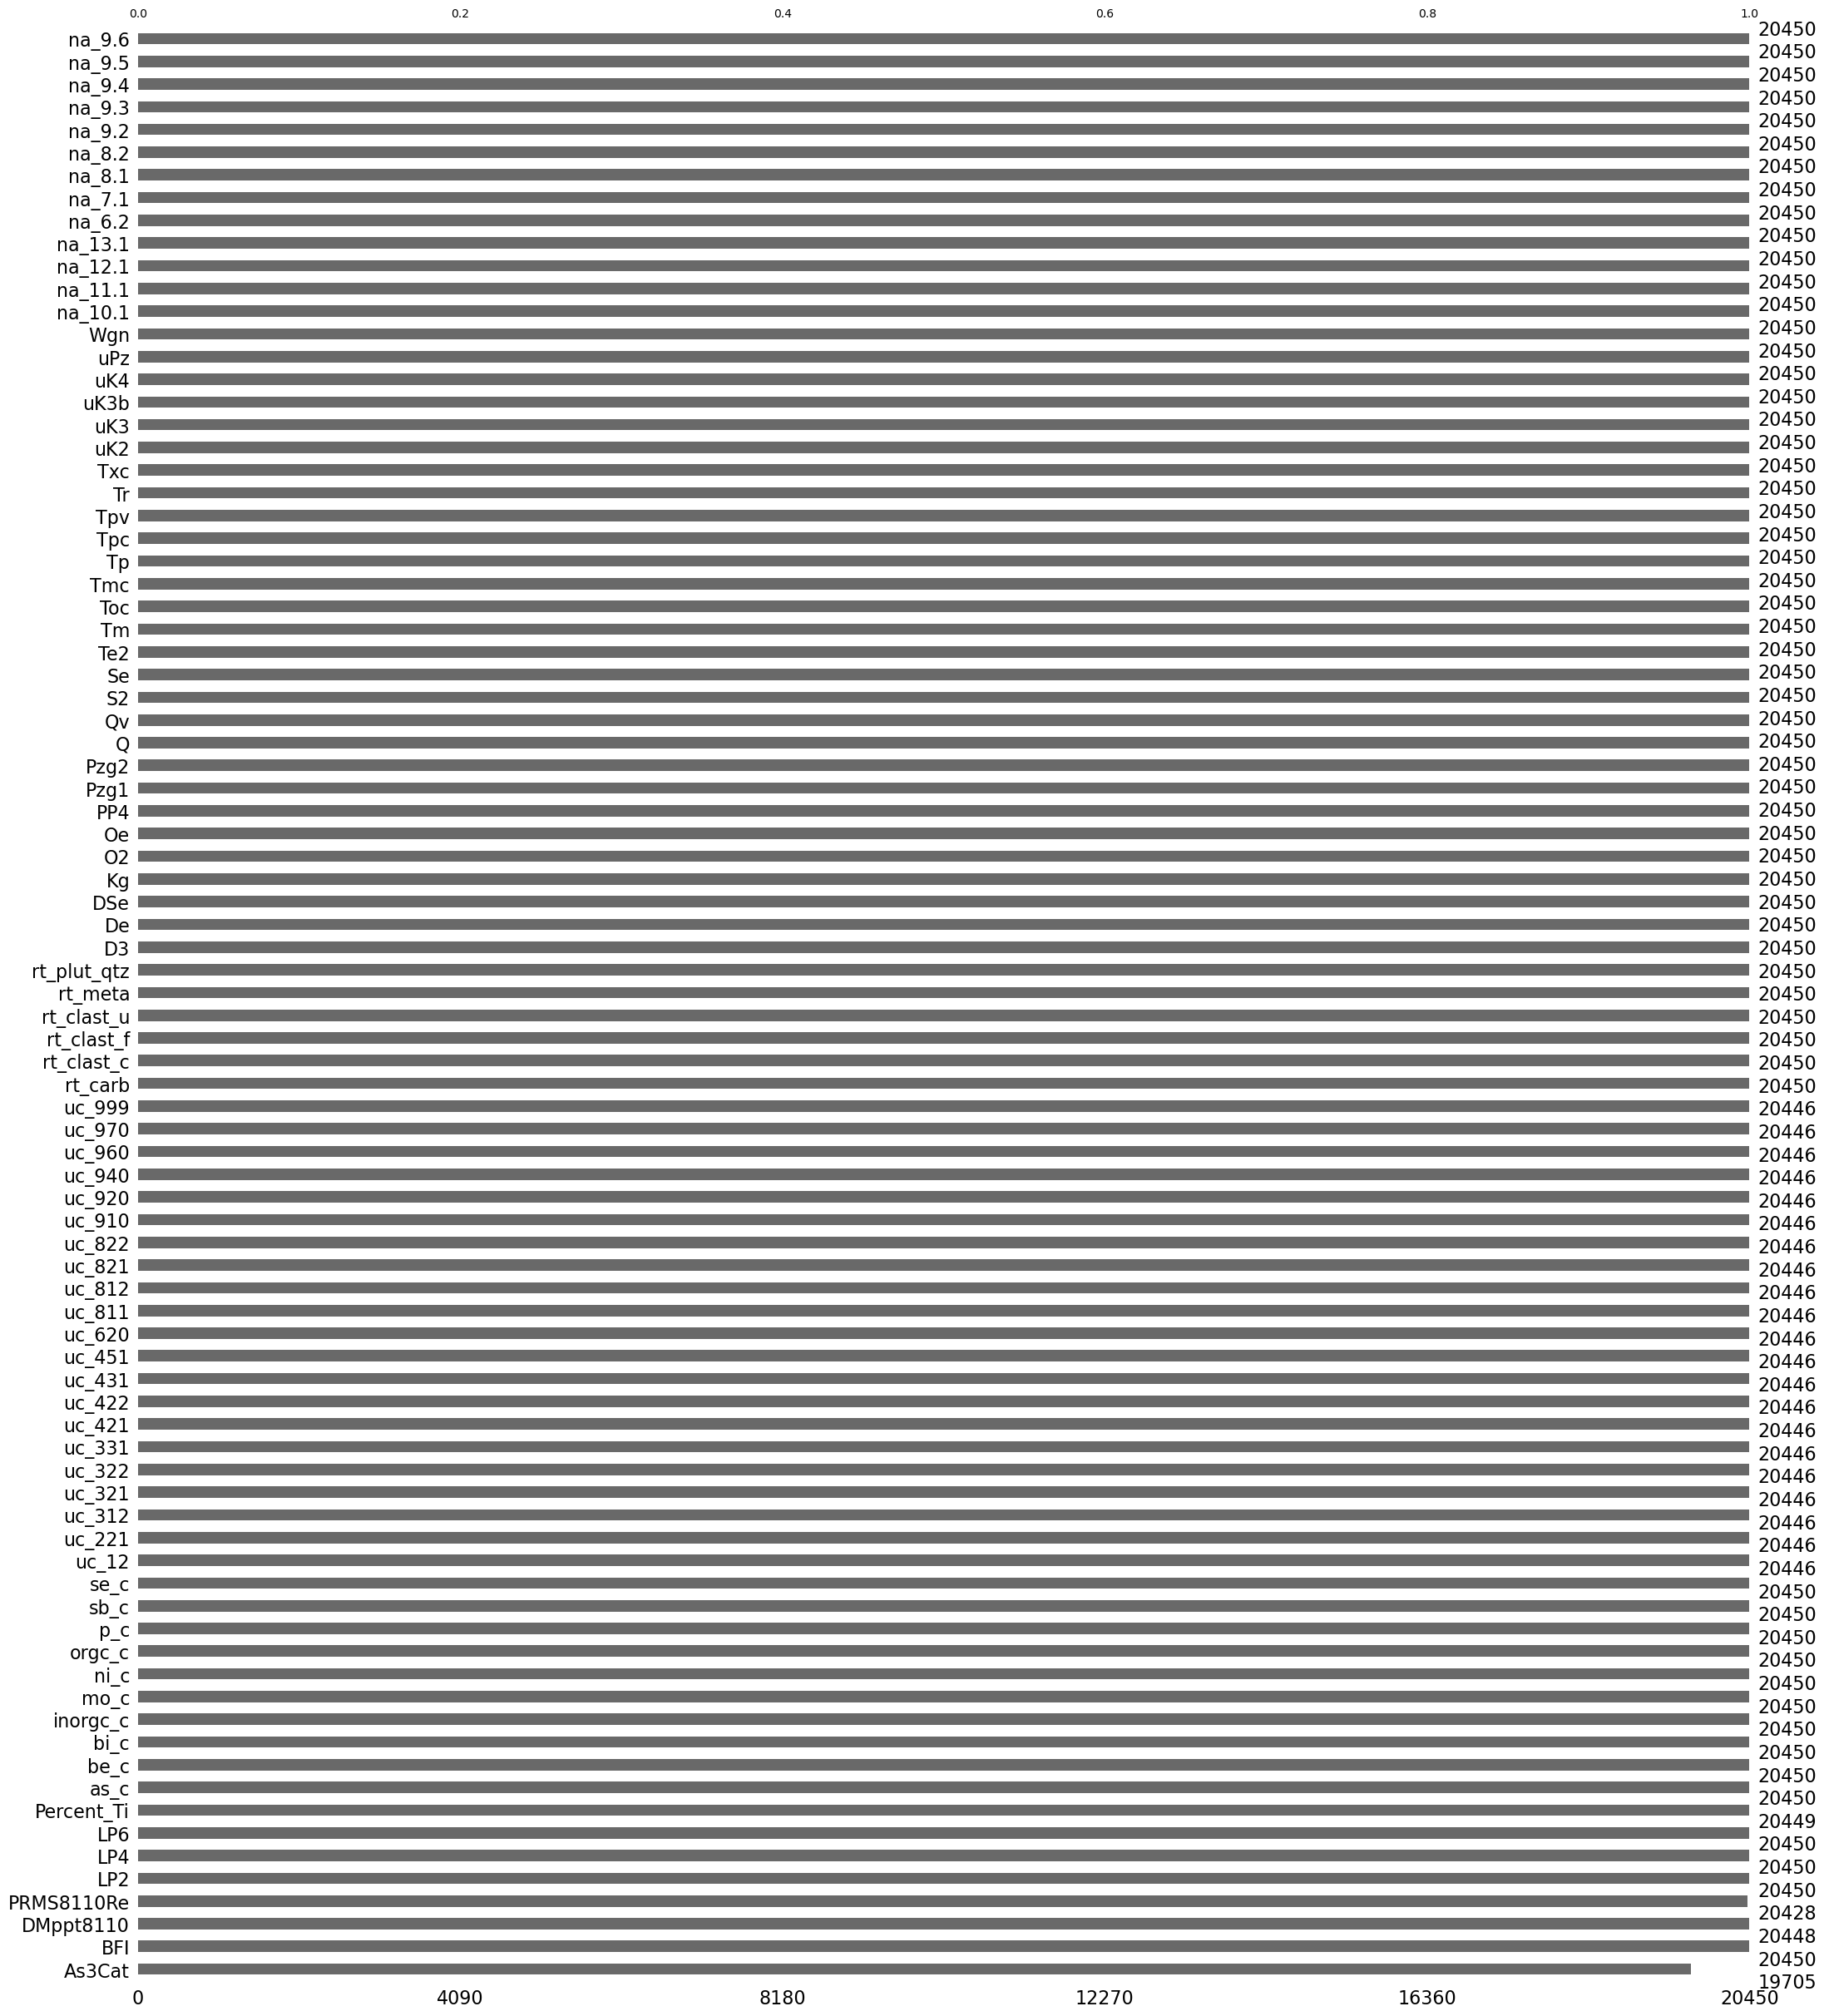

In [5]:
msno.bar(data)

### Remove Missing Values from Traget(As3Cat)

In [6]:
df = data.dropna(subset='As3Cat')
print(f'Number of All Records (Before Dropping Na Values from Target): {len(data)}')
print(f'Number of All Records (After  Dropping Na Values from Target): {len(df)}')

Number of All Records (Before Dropping Na Values from Target): 20450
Number of All Records (After  Dropping Na Values from Target): 19705


In [7]:
null_columns = df.isna().sum()
null_columns = null_columns[null_columns>0]
pd.DataFrame(null_columns).T

,DMppt8110,PRMS8110Re,Percent_Ti,uc_12,uc_221,uc_312,uc_321,uc_322,uc_331,uc_421,uc_422,uc_431,uc_451,uc_620,uc_811,uc_812,uc_821,uc_822,uc_910,uc_920,uc_940,uc_960,uc_970,uc_999
0,2,22,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [8]:
num_record = len(df)
df_num_null = df.isna().sum()
df_num_null = df_num_null.reset_index()
df_num_null.columns = ['columns', 'number_of_null']
df_num_null['percentage_of_null'] = df_num_null['number_of_null']/num_record
display(df_num_null)

data = go.Bar(
             x=df_num_null['columns'],
             y=df_num_null['number_of_null'],
             marker_color='#D65076', 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             text=df_num_null['percentage_of_null'].apply(lambda x: f'{x:.2%}')
             )

layout = go.Layout(
    title='Percentage Columns with Null Values',
    title_x=0.5,
    width=1600,
    height=650
)

fig = go.Figure(data=data, layout=layout)
fig.show()

,columns,number_of_null,percentage_of_null
0,As3Cat,0,0.000000
1,BFI,0,0.000000
2,DMppt8110,2,0.000101
3,PRMS8110Re,22,0.001116
4,LP2,0,0.000000
...,...,...,...
81,na_9.2,0,0.000000
82,na_9.3,0,0.000000
83,na_9.4,0,0.000000
84,na_9.5,0,0.000000


### Analysing Target Labels

In [9]:
num_target_labels = df['As3Cat'].value_counts()
num_target_labels = num_target_labels.reset_index()
num_target_labels.columns=['target_label', 'number_of_records']
num_target_labels['percentage_of_records'] = num_target_labels['number_of_records']/num_target_labels['number_of_records'].sum()
num_target_labels

,target_label,number_of_records,percentage_of_records
0,C1,15659,0.794671
1,C3,2383,0.120934
2,C2,1663,0.084395


In [10]:
data_bar = go.Bar(
             x=num_target_labels['target_label'],
             y=num_target_labels['percentage_of_records'],
             marker_color=['#55B4B0','#D65076'], 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             text=num_target_labels['number_of_records'].apply(lambda x: f'{x:,.0f} ') + num_target_labels['percentage_of_records'].apply(lambda x: f'({x:.2%})')
             )

layout = go.Layout(
    title='Percentage of Records with each Target Label',
    title_x=0.5,
    width=1500,
    height=650
)

fig = go.Figure(data=data_bar, layout=layout)
fig.show()

### Describe Dataset

In [11]:
df.describe()

,BFI,DMppt8110,PRMS8110Re,LP2,LP4,LP6,Percent_Ti,as_c,be_c,bi_c,inorgc_c,mo_c,ni_c,orgc_c,p_c,sb_c,se_c,uc_12,uc_221,uc_312,uc_321,uc_322,uc_331,uc_421,uc_422,uc_431,uc_451,uc_620,uc_811,uc_812,uc_821,uc_822,uc_910,uc_920,uc_940,uc_960,uc_970,uc_999,rt_carb,rt_clast_c,rt_clast_f,rt_clast_u,rt_meta,rt_plut_qtz,D3,De,DSe,Kg,O2,Oe,PP4,Pzg1,Pzg2,Q,Qv,S2,Se,Te2,Tm,Toc,Tmc,Tp,Tpc,Tpv,Tr,Txc,uK2,uK3,uK3b,uK4,uPz,Wgn,na_10.1,na_11.1,na_12.1,na_13.1,na_6.2,na_7.1,na_8.1,na_8.2,na_9.2,na_9.3,na_9.4,na_9.5,na_9.6
count,19705.000000,19703.000000,19683.000000,19705.000000,19705.000000,19705.000000,19704.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.00000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19701.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000,19705.000000
mean,44.196042,847.546978,166.569133,5261.622888,5088.938950,5191.881756,1.648619,6.982503,1.526744,0.184858,0.520340,1.044523,30.330791,0.896897,497.569626,0.685864,0.313591,0.138876,0.003046,0.002995,0.017664,0.002183,0.026598,0.056748,0.049693,0.058068,0.012740,0.003147,0.041825,0.00198,0.030557,0.026496,0.045835,0.117507,0.036597,0.001117,0.036597,0.004670,0.153565,0.237808,0.196600,0.209236,0.097691,0.049378,0.016595,0.009997,0.022634,0.007562,0.016950,0.011063,0.014311,0.010302,0.017965,0.148490,0.016595,0.008526,0.019640,0.019690,0.017102,0.003096,0.014768,0.006141,0.069272,0.008374,0.021264,0.010809,0.019944,0.026034,0.001675,0.009794,0.010150,0.003096,0.111089,0.059173,0.004263,0.015834,0.079117,0.034205,0.147830,0.024867,0.056737,0.025831,0.144938,0.012433,0.014362
std,18.451789,392.526330,177.203063,3005.486363,3056.514457,3045.550149,7.811438,7.155253,0.636800,0.122710,0.962294,1.336255,100.990274,1.690923,319.141238,0.763476,0.218138,0.345826,0.055104,0.054644,0.131731,0.046669,0.160908,0.231367,0.217315,0.233878,0.112155,0.056012,0.200195,0.04445,0.172118,0.160609,0.209133,0.322031,0.187775,0.033399,0.187775,0.068178,0.360540,0.425752,0.397437,0.406774,0.296904,0.216662,0.127751,0.099489,0.148737,0.086630,0.129087,0.104601,0.118773,0.100977,0.132827,0.355594,0.127751,0.091943,0.138762,0.138938,0.129656,0.055554,0.120625,0.078123,0.253922,0.091125,0.144266,0.103408,0.139812,0.159240,0.040890,0.098484,0.100236,0.055554,0.314250,0.235954,0.065153,0.124834,0.269928,0.181759,0.354941,0.155723,0.231345,0.158635,0.352047,0.110813,0.118980
min,0.000000,65.233300,0.000000,0.000000,0.000000,0.000000,0.000000,0.001118,0.000369,0.000032,0.000000,0.000179,0.002669,0.000031,0.054348,0.000217,0.000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,487.716500,19.896803,2615.0

### Detaset General Information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19705 entries, 0 to 20449
Data columns (total 86 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   As3Cat       19705 non-null  object 
 1   BFI          19705 non-null  int64  
 2   DMppt8110    19703 non-null  float64
 3   PRMS8110Re   19683 non-null  float64
 4   LP2          19705 non-null  int64  
 5   LP4          19705 non-null  int64  
 6   LP6          19705 non-null  int64  
 7   Percent_Ti   19704 non-null  float64
 8   as_c         19705 non-null  float64
 9   be_c         19705 non-null  float64
 10  bi_c         19705 non-null  float64
 11  inorgc_c     19705 non-null  float64
 12  mo_c         19705 non-null  float64
 13  ni_c         19705 non-null  float64
 14  orgc_c       19705 non-null  float64
 15  p_c          19705 non-null  float64
 16  sb_c         19705 non-null  float64
 17  se_c         19705 non-null  float64
 18  uc_12        19701 non-null  float64
 19  uc_221   

### Columns Type

In [13]:
num_uniques = pd.Series(index=df.columns)
numerical_columns = []
categorical_columns = []
for c in df.columns:
    num_uniques[c] = df[c].nunique()
    if num_uniques[c]<10:
        categorical_columns.append(c)
    else:
        numerical_columns.append(c)

print(f'categorical columns : {categorical_columns}')
print(f'numerical columns : {numerical_columns}')

display(pd.DataFrame(num_uniques).T)

categorical columns : ['As3Cat', 'uc_12', 'uc_221', 'uc_312', 'uc_321', 'uc_322', 'uc_331', 'uc_421', 'uc_422', 'uc_431', 'uc_451', 'uc_620', 'uc_811', 'uc_812', 'uc_821', 'uc_822', 'uc_910', 'uc_920', 'uc_940', 'uc_960', 'uc_970', 'uc_999', 'rt_carb', 'rt_clast_c', 'rt_clast_f', 'rt_clast_u', 'rt_meta', 'rt_plut_qtz', 'D3', 'De', 'DSe', 'Kg', 'O2', 'Oe', 'PP4', 'Pzg1', 'Pzg2', 'Q', 'Qv', 'S2', 'Se', 'Te2', 'Tm', 'Toc', 'Tmc', 'Tp', 'Tpc', 'Tpv', 'Tr', 'Txc', 'uK2', 'uK3', 'uK3b', 'uK4', 'uPz', 'Wgn', 'na_10.1', 'na_11.1', 'na_12.1', 'na_13.1', 'na_6.2', 'na_7.1', 'na_8.1', 'na_8.2', 'na_9.2', 'na_9.3', 'na_9.4', 'na_9.5', 'na_9.6']
numerical columns : ['BFI', 'DMppt8110', 'PRMS8110Re', 'LP2', 'LP4', 'LP6', 'Percent_Ti', 'as_c', 'be_c', 'bi_c', 'inorgc_c', 'mo_c', 'ni_c', 'orgc_c', 'p_c', 'sb_c', 'se_c']


,As3Cat,BFI,DMppt8110,PRMS8110Re,LP2,LP4,LP6,Percent_Ti,as_c,be_c,bi_c,inorgc_c,mo_c,ni_c,orgc_c,p_c,sb_c,se_c,uc_12,uc_221,uc_312,uc_321,uc_322,uc_331,uc_421,uc_422,uc_431,uc_451,uc_620,uc_811,uc_812,uc_821,uc_822,uc_910,uc_920,uc_940,uc_960,uc_970,uc_999,rt_carb,rt_clast_c,rt_clast_f,rt_clast_u,rt_meta,rt_plut_qtz,D3,De,DSe,Kg,O2,Oe,PP4,Pzg1,Pzg2,Q,Qv,S2,Se,Te2,Tm,Toc,Tmc,Tp,Tpc,Tpv,Tr,Txc,uK2,uK3,uK3b,uK4,uPz,Wgn,na_10.1,na_11.1,na_12.1,na_13.1,na_6.2,na_7.1,na_8.1,na_8.2,na_9.2,na_9.3,na_9.4,na_9.5,na_9.6
0,3.0,90.0,14403.0,8225.0,8262.0,8475.0,8489.0,404.0,9425.0,9244.0,9215.0,8029.0,9390.0,9352.0,9417.0,9415.0,9398.0,8407.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [14]:
num_uniques = df[categorical_columns].nunique()
num_uniques = pd.DataFrame(num_uniques).reset_index()
num_uniques.columns = ['column','num_unique']
num_uniques
data = go.Bar(
             x=num_uniques['column'],
             y=num_uniques['num_unique'],
             marker_color='#D65076', 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             text=num_uniques['num_unique'].apply(lambda x: f'{x}')
             )

layout = go.Layout(
    title='Number of Unique Values in each categorical column',
    title_x=0.5,
    width=1600,
    height=650
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [15]:
df[numerical_columns].head()

,BFI,DMppt8110,PRMS8110Re,LP2,LP4,LP6,Percent_Ti,as_c,be_c,bi_c,inorgc_c,mo_c,ni_c,orgc_c,p_c,sb_c,se_c
0,56,839.200,247.441884,9461,9082,5922,0.000000,3.17733,0.869639,0.080221,0.015112,0.325486,14.890099,0.143343,272.677001,0.308952,0.200479
1,55,893.233,195.643090,8643,2398,8320,0.000000,3.60064,1.010139,0.087147,0.016818,0.363400,16.245599,0.144275,297.666992,0.337125,0.200251
2,58,679.367,130.819832,8316,5797,5696,0.000000,3.78692,0.842530,0.101319,1.763579,0.631829,22.192300,0.375681,412.441986,0.412636,0.208570
3,57,840.633,247.441884,5557,7186,4927,0.953611,3.17733,0.869639,0.080221,0.015112,0.325486,14.890099,0.143343,272.677001,0.308952,0.200479
4,45,756.400,151.432342,9623,7179,6061,22.005550,8.16806,1.161360,0.163910,1.213449,1.437340,26.270799,0.397736,515.302001,0.886938,0.239735


In [16]:
df[categorical_columns].head()


,As3Cat,uc_12,uc_221,uc_312,uc_321,uc_322,uc_331,uc_421,uc_422,uc_431,uc_451,uc_620,uc_811,uc_812,uc_821,uc_822,uc_910,uc_920,uc_940,uc_960,uc_970,uc_999,rt_carb,rt_clast_c,rt_clast_f,rt_clast_u,rt_meta,rt_plut_qtz,D3,De,DSe,Kg,O2,Oe,PP4,Pzg1,Pzg2,Q,Qv,S2,Se,Te2,Tm,Toc,Tmc,Tp,Tpc,Tpv,Tr,Txc,uK2,uK3,uK3b,uK4,uPz,Wgn,na_10.1,na_11.1,na_12.1,na_13.1,na_6.2,na_7.1,na_8.1,na_8.2,na_9.2,na_9.3,na_9.4,na_9.5,na_9.6
0,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [17]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19705 entries, 0 to 20449
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   As3Cat       19705 non-null  object 
 1   uc_12        19701 non-null  float64
 2   uc_221       19701 non-null  float64
 3   uc_312       19701 non-null  float64
 4   uc_321       19701 non-null  float64
 5   uc_322       19701 non-null  float64
 6   uc_331       19701 non-null  float64
 7   uc_421       19701 non-null  float64
 8   uc_422       19701 non-null  float64
 9   uc_431       19701 non-null  float64
 10  uc_451       19701 non-null  float64
 11  uc_620       19701 non-null  float64
 12  uc_811       19701 non-null  float64
 13  uc_812       19701 non-null  float64
 14  uc_821       19701 non-null  float64
 15  uc_822       19701 non-null  float64
 16  uc_910       19701 non-null  float64
 17  uc_920       19701 non-null  float64
 18  uc_940       19701 non-null  float64
 19  uc_960   

## Seperate X and y

In [18]:
print(len(categorical_columns))
if 'As3Cat' in categorical_columns:
    categorical_columns.remove('As3Cat')
    
print(len(categorical_columns))

df.reset_index(drop=True,inplace=True)
X = df.drop(['As3Cat'], axis=1).copy()
y = df['As3Cat'].copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

69
68


### Create ML Models to predict "As3Cat"

### Model Pipline for RandomForest Classifier

In [22]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('OneHotEncoder', OneHotEncoder(handle_unknown="ignore"))])

numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('StandardScaler', StandardScaler())])

preprocessor = ColumnTransformer([
         ('one-hot-encoder', categorical_transformer, categorical_columns),
         ('standard-scaler', numeric_transformer, numerical_columns)])

# create model
model = RandomForestClassifier(class_weight="balanced", random_state=1)

# create SMOTE Over Sampler
# over_sampler = SMOTE(k_neighbors=3)
over_sampler = SMOTETomek()

# create Model Pipline
pipeline_steps = [('preprocessor', preprocessor), ('over', over_sampler), ('model', model)]
pipeline_rf = Pipeline(steps=pipeline_steps)

pipeline_rf.fit(X_train, y_train)
y_train_pred_rf = pipeline_rf.predict(X_train)
y_test_pred_rf = pipeline_rf.predict(X_test)


In [23]:
print(f'classification_report for Train (Random Forest): \n{classification_report(y_train, y_train_pred_rf)}')
print(f'confusion_matrix for Train(Random Forest): \n{confusion_matrix(y_train, y_train_pred_rf)}')
print('==============================================================================')
print(f'classification_report for Test(Random Forest): \n{classification_report(y_test, y_test_pred_rf)}')
print(f'confusion_matrix for Test(Random Forest): \n{confusion_matrix(y_test, y_test_pred_rf)}')

classification_report for Train (Random Forest): 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10491
           1       0.97      0.98      0.97      1114
           2       0.98      0.98      0.98      1597

    accuracy                           0.99     13202
   macro avg       0.98      0.98      0.98     13202
weighted avg       0.99      0.99      0.99     13202

confusion_matrix for Train(Random Forest): 
[[10428    28    35]
 [   21  1089     4]
 [   23     4  1570]]
classification_report for Test(Random Forest): 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5168
           1       0.23      0.22      0.22       549
           2       0.53      0.48      0.50       786

    accuracy                           0.79      6503
   macro avg       0.55      0.53      0.54      6503
weighted avg       0.78      0.79      0.79      6503

confusion_matrix for Test(Random

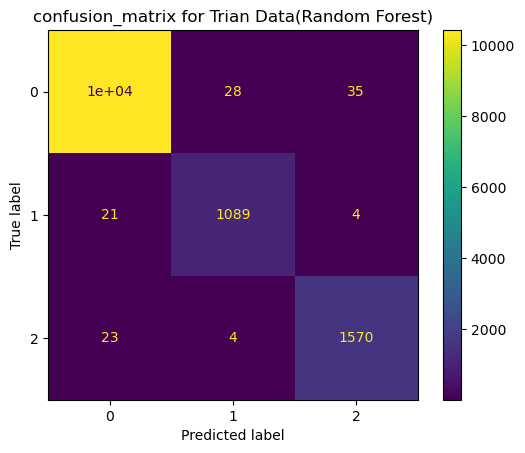

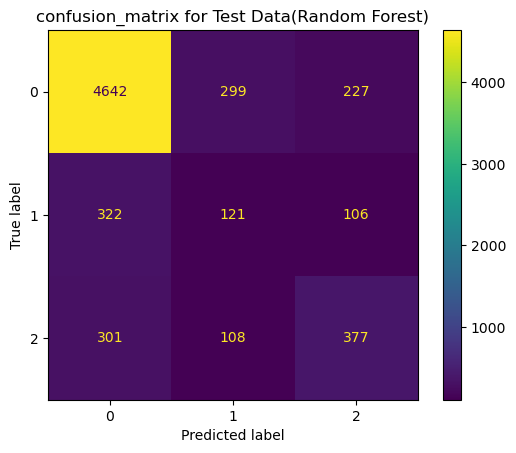

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_pred_rf), display_labels=pipeline_rf.classes_)
disp.plot()
plt.title('confusion_matrix for Trian Data(Random Forest)')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred_rf), display_labels=pipeline_rf.classes_)
disp.plot()
plt.title('confusion_matrix for Test Data(Random Forest)')
plt.show()

In [25]:
feature_importances = pipeline_steps[2][1].feature_importances_
feature_names = pipeline_rf[:-1].get_feature_names_out()

feature_importance_df_rf = pd.DataFrame()
feature_importance_df_rf['Feature'] = feature_names
feature_importance_df_rf['Importance'] = feature_importances
feature_importance_df_rf = feature_importance_df_rf.sort_values('Importance', ascending=True)


# Plot Feature Importance 
data_imp = go.Bar(
             x=feature_importance_df_rf['Feature'],
             y=feature_importance_df_rf['Importance'],
             marker_color='#D65076', 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             orientation='v',
             text=feature_importance_df_rf['Importance'].apply(lambda x: f'{x:0.4f}')
             )

layout = go.Layout(
    title='Feature Importance in Random Froest',
    title_x=0.5,
    width=1800,
    height=900
)

fig = go.Figure(data=data_imp, layout=layout)
fig.show()

### Model Pipline for XGBoost Classifier

In [26]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('OneHotEncoder', OneHotEncoder(handle_unknown="ignore"))])

numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('StandardScaler', StandardScaler())])

preprocessor = ColumnTransformer([
         ('one-hot-encoder', categorical_transformer, categorical_columns),
         ('standard-scaler', numeric_transformer, numerical_columns)])

# create model
model = XGBClassifier(class_weight="balanced", random_state=1)

# create SMOTE Over Sampler
# over_sampler = SMOTE(k_neighbors=3)
over_sampler = SMOTETomek()

# create Model Pipline
pipeline_steps = [('preprocessor', preprocessor), ('over', over_sampler), ('model', model)]
pipeline_xgb = Pipeline(steps=pipeline_steps)

pipeline_xgb.fit(X_train, y_train)
y_train_pred_xgb = pipeline_xgb.predict(X_train)
y_test_pred_xgb = pipeline_xgb.predict(X_test)

In [27]:
print(f'classification_report for Train(XGBoost): \n{classification_report(y_train, y_train_pred_xgb)}')
print(f'confusion_matrix for Train(XGBoost): \n{confusion_matrix(y_train, y_train_pred_xgb)}')
print('==============================================================================')
print(f'classification_report for Test(XGBoost): \n{classification_report(y_test, y_test_pred_xgb)}')
print(f'confusion_matrix for Test(XGBoost): \n{confusion_matrix(y_test, y_test_pred_xgb)}')

classification_report for Train(XGBoost): 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     10491
           1       0.60      0.76      0.67      1114
           2       0.75      0.83      0.79      1597

    accuracy                           0.89     13202
   macro avg       0.77      0.83      0.80     13202
weighted avg       0.90      0.89      0.90     13202

confusion_matrix for Train(XGBoost): 
[[9614  504  373]
 [ 210  849   55]
 [ 206   73 1318]]
classification_report for Test(XGBoost): 
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5168
           1       0.23      0.30      0.26       549
           2       0.50      0.51      0.50       786

    accuracy                           0.77      6503
   macro avg       0.54      0.55      0.55      6503
weighted avg       0.79      0.77      0.78      6503

confusion_matrix for Test(XGBoost): 
[[4449  421  298]
 [ 27

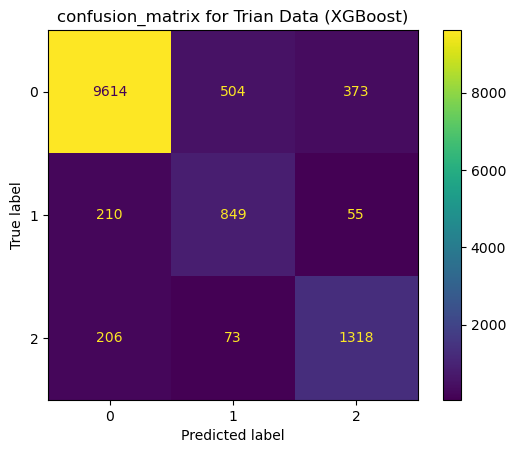

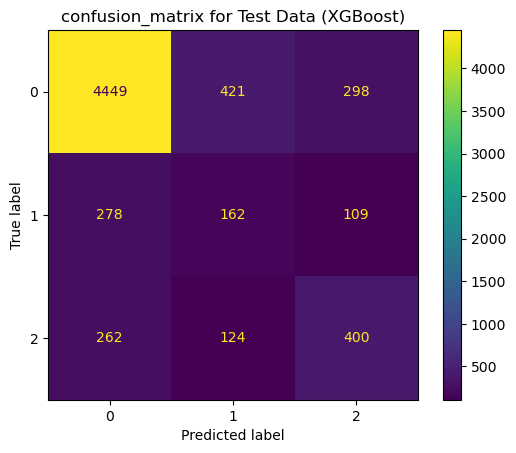

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_pred_xgb), display_labels=pipeline_xgb.classes_)
disp.plot()
plt.title('confusion_matrix for Trian Data (XGBoost)')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred_xgb), display_labels=pipeline_xgb.classes_)
disp.plot()
plt.title('confusion_matrix for Test Data (XGBoost)')
plt.show()

In [29]:
feature_importances = pipeline_steps[2][1].feature_importances_
feature_names = pipeline_xgb[:-1].get_feature_names_out()

feature_importance_df_xgb = pd.DataFrame()
feature_importance_df_xgb['Feature'] = feature_names
feature_importance_df_xgb['Importance'] = feature_importances
feature_importance_df_xgb = feature_importance_df_xgb.sort_values('Importance', ascending=True)


# Plot Feature Importance 
data_imp = go.Bar(
             x=feature_importance_df_xgb['Feature'],
             y=feature_importance_df_xgb['Importance'],
             marker_color='#D65076', 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             orientation='v',
             text=feature_importance_df_xgb['Importance'].apply(lambda x: f'{x:0.4f}')
             )

layout = go.Layout(
    title='Feature Importance in XGBoost',
    title_x=0.5,
    width=1800,
    height=900
)

fig = go.Figure(data=data_imp, layout=layout)
fig.show()

### Model Pipline for CatBoost Classifier

In [30]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('OneHotEncoder', OneHotEncoder(handle_unknown="ignore"))])

numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('StandardScaler', StandardScaler())])

preprocessor = ColumnTransformer([
         ('one-hot-encoder', categorical_transformer, categorical_columns),
         ('standard-scaler', numeric_transformer, numerical_columns)])

# create model
model = CatBoostClassifier( random_state=1,verbose=False)

# create SMOTE Over Sampler
# over_sampler = SMOTE(k_neighbors=3)
over_sampler = SMOTETomek()

# create Model Pipline
pipeline_steps = [('preprocessor', preprocessor), ('over', over_sampler), ('model', model)]
pipeline_ctb = Pipeline(steps=pipeline_steps)

pipeline_ctb.fit(X_train, y_train)
y_train_pred_ctb = pipeline_ctb.predict(X_train)
y_test_pred_ctb = pipeline_ctb.predict(X_test)

In [31]:
print(f'classification_report for Train(CatBoost): \n{classification_report(y_train, y_train_pred_ctb)}')
print(f'confusion_matrix for Train(CatBoost): \n{confusion_matrix(y_train, y_train_pred_ctb)}')
print('==============================================================================')
print(f'classification_report for Test(CatBoost): \n{classification_report(y_test, y_test_pred_ctb)}')
print(f'confusion_matrix for Test(CatBoost): \n{confusion_matrix(y_test, y_test_pred_ctb)}')

classification_report for Train(CatBoost): 
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     10491
           1       0.60      0.71      0.65      1114
           2       0.73      0.81      0.77      1597

    accuracy                           0.89     13202
   macro avg       0.76      0.81      0.78     13202
weighted avg       0.89      0.89      0.89     13202

confusion_matrix for Train(CatBoost): 
[[9609  473  409]
 [ 262  790   62]
 [ 241   57 1299]]
classification_report for Test(CatBoost): 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5168
           1       0.23      0.27      0.25       549
           2       0.48      0.51      0.49       786

    accuracy                           0.77      6503
   macro avg       0.53      0.55      0.54      6503
weighted avg       0.79      0.77      0.78      6503

confusion_matrix for Test(CatBoost): 
[[4471  388  309]
 

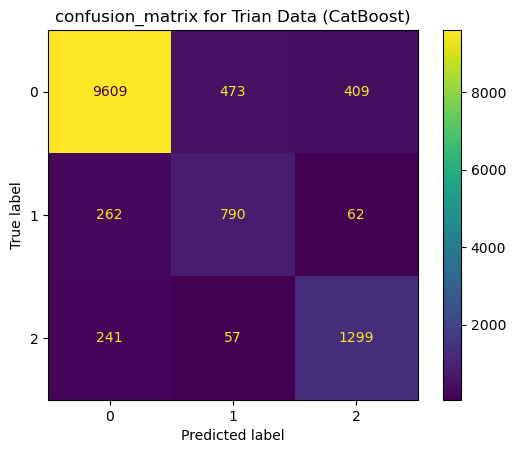

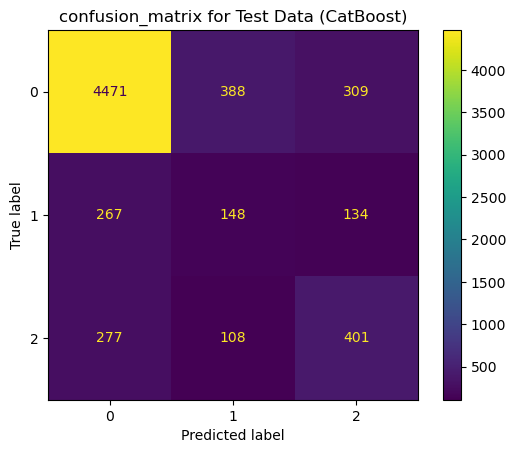

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_pred_ctb), display_labels=pipeline_ctb.classes_)
disp.plot()
plt.title('confusion_matrix for Trian Data (CatBoost)')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred_ctb), display_labels=pipeline_ctb.classes_)
disp.plot()
plt.title('confusion_matrix for Test Data (CatBoost)')
plt.show()

In [33]:
feature_importances = pipeline_steps[2][1].feature_importances_
feature_names = pipeline_ctb[:-1].get_feature_names_out()

feature_importance_df_ctb = pd.DataFrame()
feature_importance_df_ctb['Feature'] = feature_names
feature_importance_df_ctb['Importance'] = feature_importances
feature_importance_df_ctb = feature_importance_df_ctb.sort_values('Importance', ascending=True)


# Plot Feature Importance 
data_imp = go.Bar(
             x=feature_importance_df_ctb['Feature'],
             y=feature_importance_df_ctb['Importance'],
             marker_color='#D65076', 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             orientation='v',
             text=feature_importance_df_ctb['Importance'].apply(lambda x: f'{x:0.4f}')
             )

layout = go.Layout(
    title='Feature Importance in CatBoost',
    title_x=0.5,
    width=1800,
    height=900
)

fig = go.Figure(data=data_imp, layout=layout)
fig.show()

### Model Pipline for LogisticRegression Classifier

In [34]:
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('OneHotEncoder', OneHotEncoder(handle_unknown="ignore"))])

numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('StandardScaler', StandardScaler())])

preprocessor = ColumnTransformer([
         ('one-hot-encoder', categorical_transformer, categorical_columns),
         ('standard-scaler', numeric_transformer, numerical_columns)])

# create model
model = LogisticRegression(class_weight="balanced", random_state=1)

# create SMOTE Over Sampler
# over_sampler = SMOTE(k_neighbors=3)
over_sampler = SMOTETomek()

# create Model Pipline
pipeline_steps = [('preprocessor', preprocessor), ('over', over_sampler), ('model', model)]
pipeline_lr = Pipeline(steps=pipeline_steps)

pipeline_lr.fit(X_train, y_train)
y_train_pred_lr = pipeline_lr.predict(X_train)
y_test_pred_lr = pipeline_lr.predict(X_test)

In [35]:
print(f'classification_report for Train(LogisticRegression): \n{classification_report(y_train, y_train_pred_lr)}')
print(f'confusion_matrix for Train(LogisticRegression): \n{confusion_matrix(y_train, y_train_pred_lr)}')
print('==============================================================================')
print(f'classification_report for Test(LogisticRegression): \n{classification_report(y_test, y_test_pred_lr)}')
print(f'confusion_matrix for Test(LogisticRegression): \n{confusion_matrix(y_test, y_test_pred_lr)}')

classification_report for Train(LogisticRegression): 
              precision    recall  f1-score   support

           0       0.92      0.61      0.73     10491
           1       0.16      0.47      0.24      1114
           2       0.32      0.59      0.41      1597

    accuracy                           0.60     13202
   macro avg       0.47      0.56      0.46     13202
weighted avg       0.79      0.60      0.65     13202

confusion_matrix for Train(LogisticRegression): 
[[6387 2374 1730]
 [ 264  525  325]
 [ 254  394  949]]
classification_report for Test(LogisticRegression): 
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      5168
           1       0.15      0.44      0.22       549
           2       0.28      0.53      0.37       786

    accuracy                           0.58      6503
   macro avg       0.45      0.53      0.44      6503
weighted avg       0.78      0.58      0.64      6503

confusion_matrix for Test(L

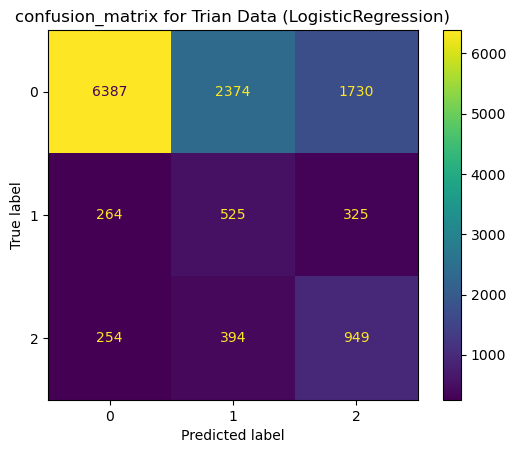

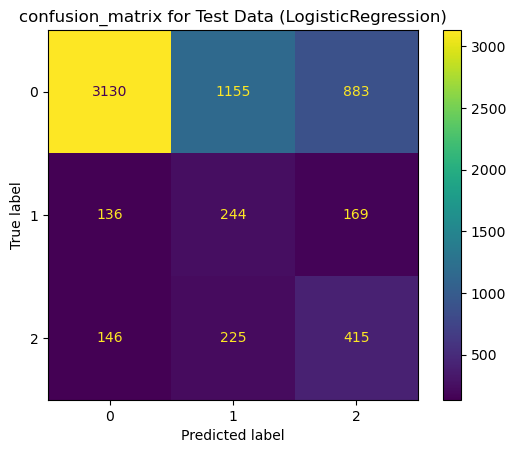

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_train_pred_lr), display_labels=pipeline_ctb.classes_)
disp.plot()
plt.title('confusion_matrix for Trian Data (LogisticRegression)')
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred_lr), display_labels=pipeline_ctb.classes_)
disp.plot()
plt.title('confusion_matrix for Test Data (LogisticRegression)')
plt.show()

In [37]:
feature_importances = pipeline_steps[2][1].coef_[0]
feature_names = pipeline_lr[:-1].get_feature_names_out()

feature_importance_df_lr = pd.DataFrame()
feature_importance_df_lr['Feature'] = feature_names
feature_importance_df_lr['Coefs'] = feature_importances
feature_importance_df_lr['Coefs_abs'] = feature_importance_df_lr['Coefs'].abs()

feature_importance_df_lr = feature_importance_df_lr.sort_values('Coefs_abs', ascending=True)

# Plot Feature Importance 
data_imp = go.Bar(
             x=feature_importance_df_lr['Feature'],
             y=feature_importance_df_lr['Coefs_abs'],
             marker_color='#D65076', 
             marker_line_color='#363945', 
             marker_line_width=2,
             opacity = 0.8,
             orientation='v',
             text=feature_importance_df_lr['Coefs_abs'].apply(lambda x: f'{x:0.4f}')
             )

layout = go.Layout(
    title='Feature Coefs_abs in LogisticRegression',
    title_x=0.5,
    width=1800,
    height=900
)

fig = go.Figure(data=data_imp, layout=layout)
fig.show()